In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

c:\Users\Sam\miniconda3\envs\torch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tests1=[  {"stance":False, "augmentation":False, "balancing":False, "gamma":0, "model_name":'bert-base-uncased', "test_name":"base",},
          {"stance":True, "augmentation":False, "balancing":False, "gamma":0, "model_name":'bert-base-uncased', "test_name":"stance"},
          {"stance":True, "augmentation":True, "balancing":False, "gamma":0, "model_name":'bert-base-uncased', "test_name":"aug",},
          {"stance":True, "augmentation":True, "balancing":True, "gamma":0, "model_name":'bert-base-uncased', "test_name":"bal",},
          {"stance":True, "augmentation":True, "balancing":True, "gamma":1.5, "model_name":'bert-base-uncased', "test_name":"complete"}]
          

tests2=[  {"stance":True, "augmentation":True, "balancing":True, "gamma":1.5, "model_name":'bert-base-uncased', "test_name":"complete"},
          {"stance":True, "augmentation":True, "balancing":True, "gamma":1.5, "model_name":'roberta-base', "test_name":"roberta"},
          {"stance":True, "augmentation":True, "balancing":True, "gamma":1.5, "model_name":'distilroberta-base', "test_name":"distil_roberta"},
          {"stance":True, "augmentation":True, "balancing":True, "gamma":1.5, "model_name":'prajjwal1/bert-tiny', "test_name":"tiny_bert"},
          {"stance":True, "augmentation":True, "balancing":True, "gamma":1.5, "model_name":'lstm', "test_name":"lstm"}]


seeds=[42,77,93]

results = 'results/'
results_t = 'results/thresholded/'

plt.style.use('default')

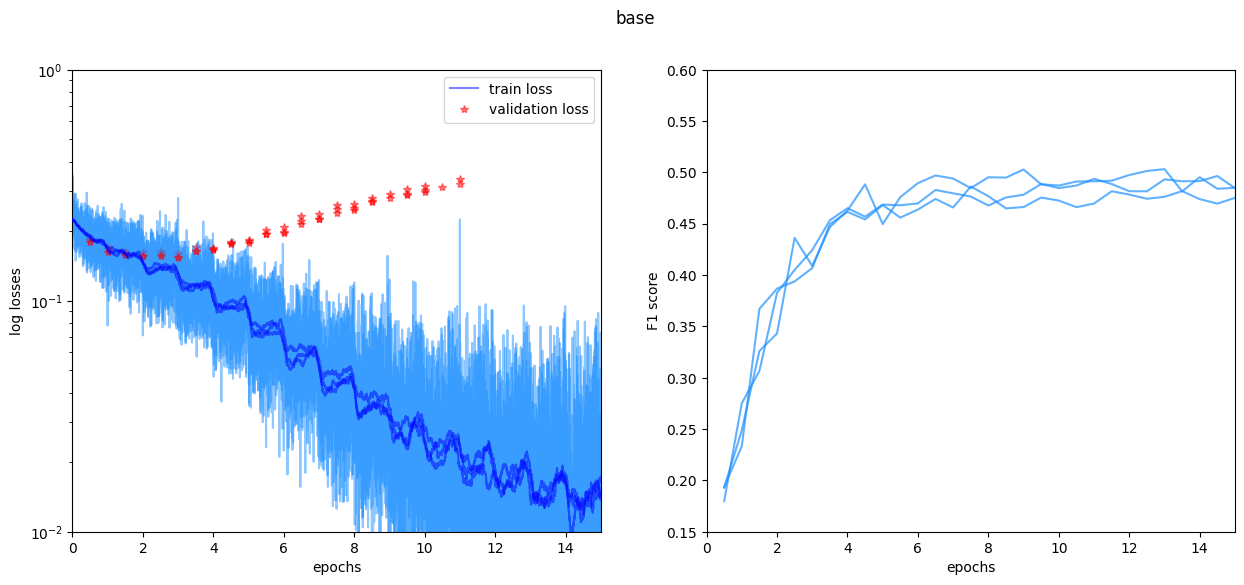

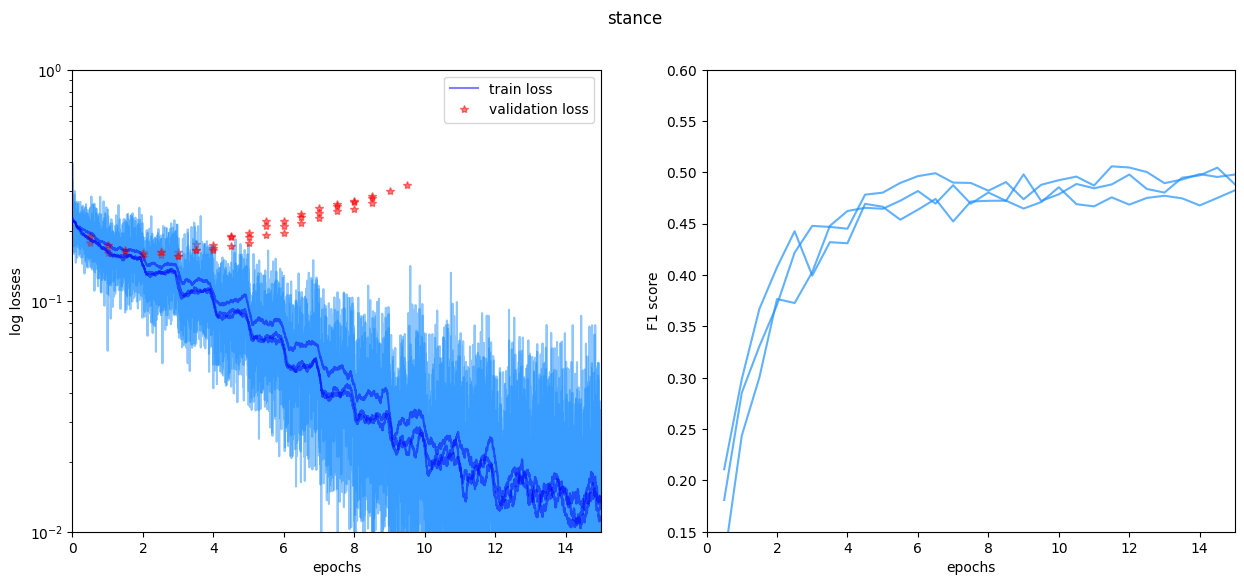

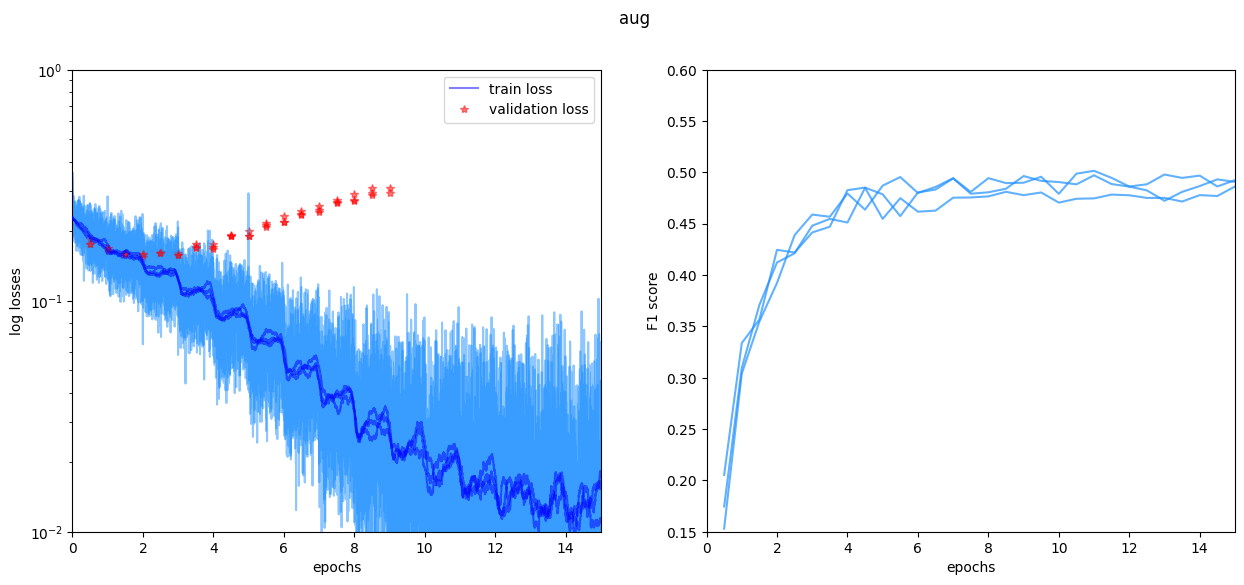

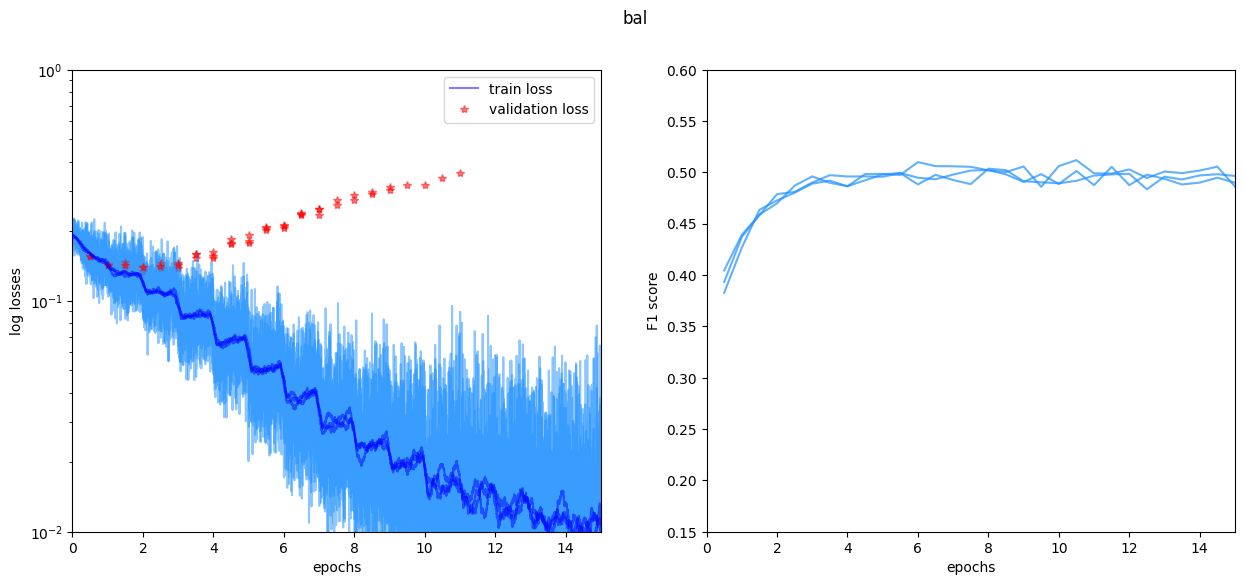

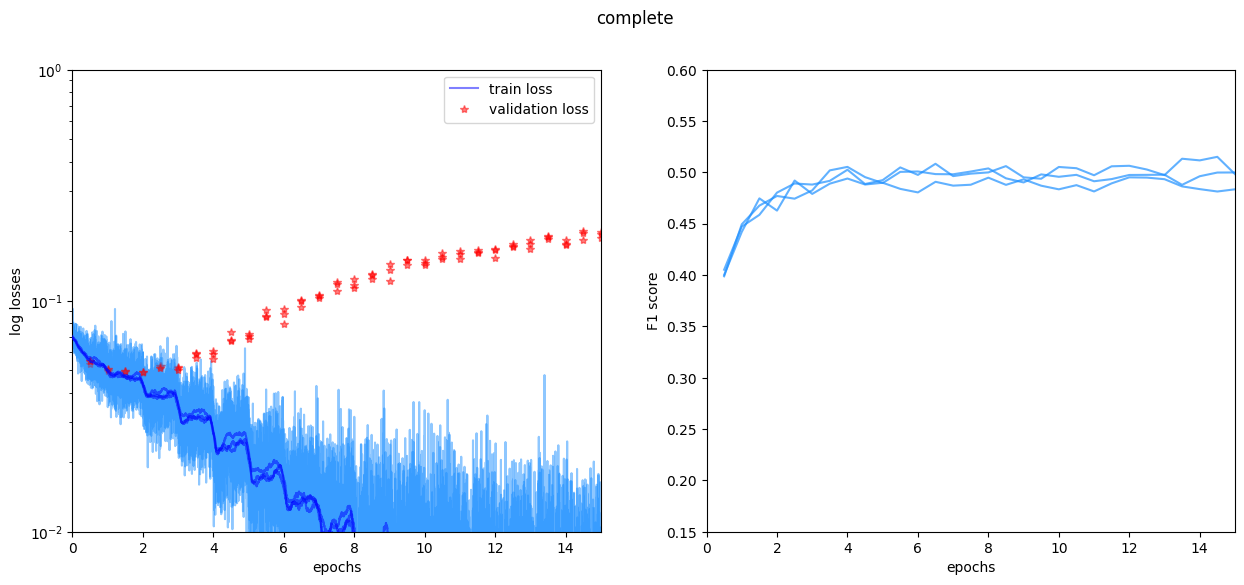

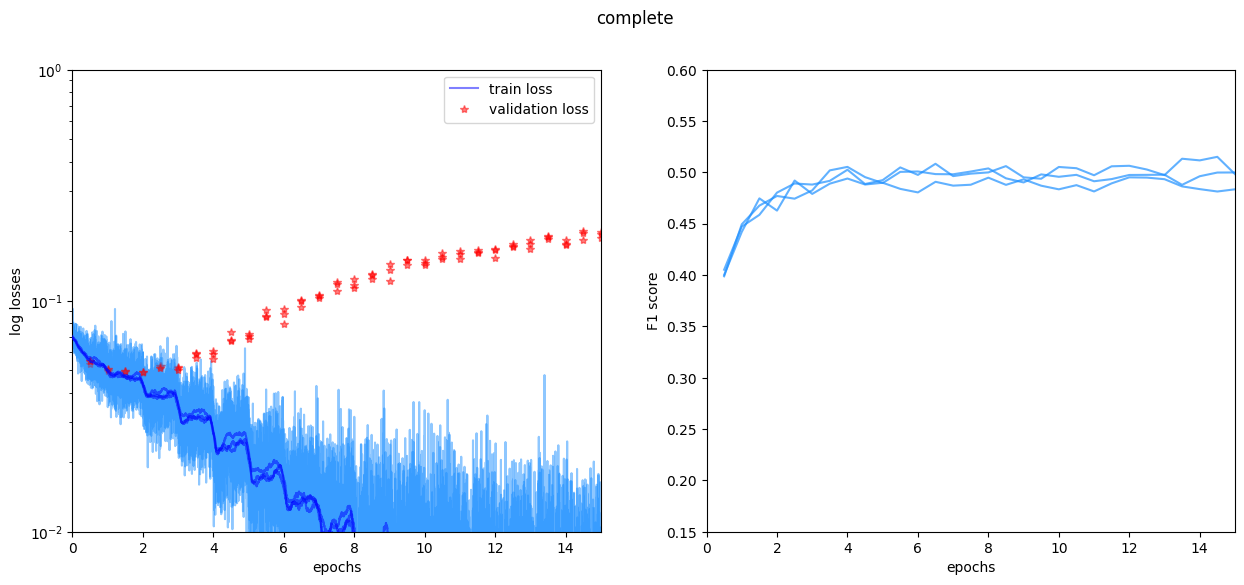

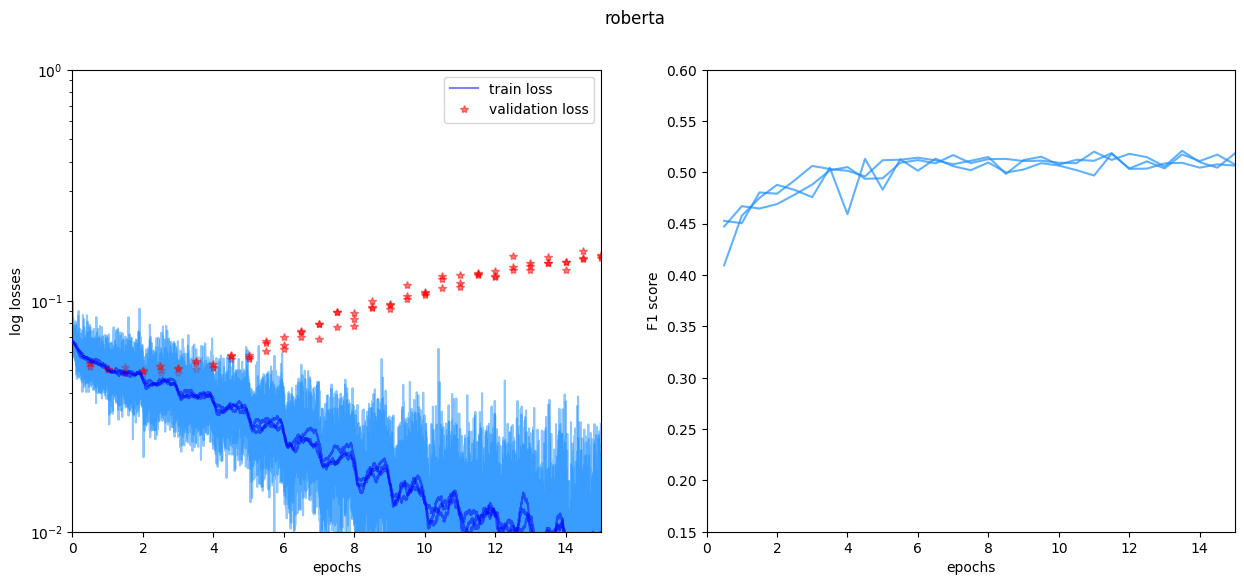

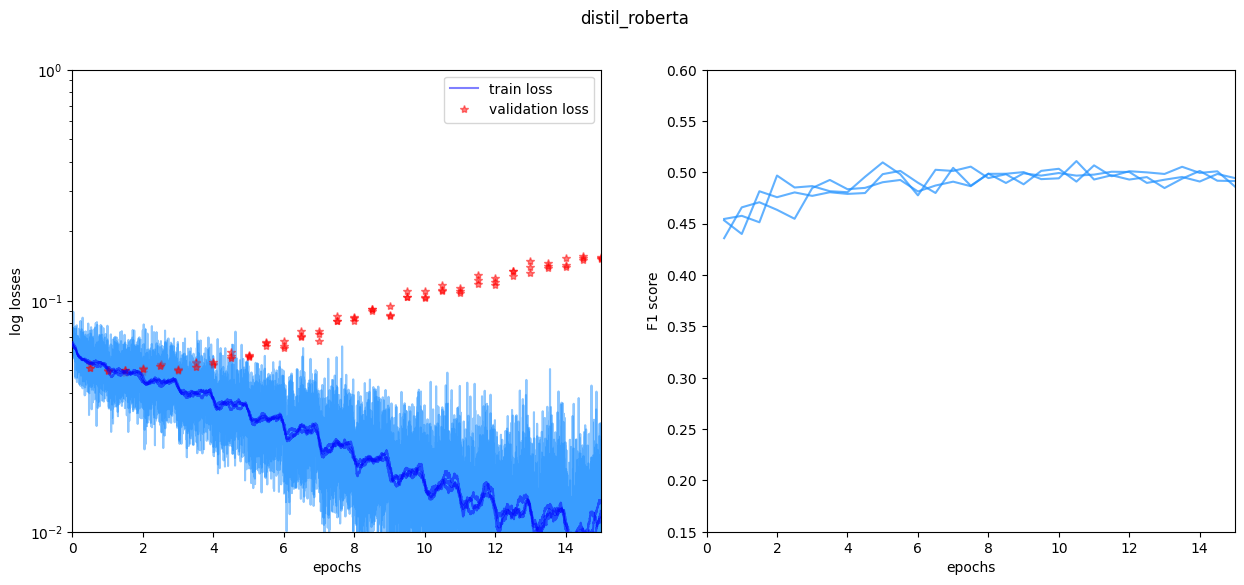

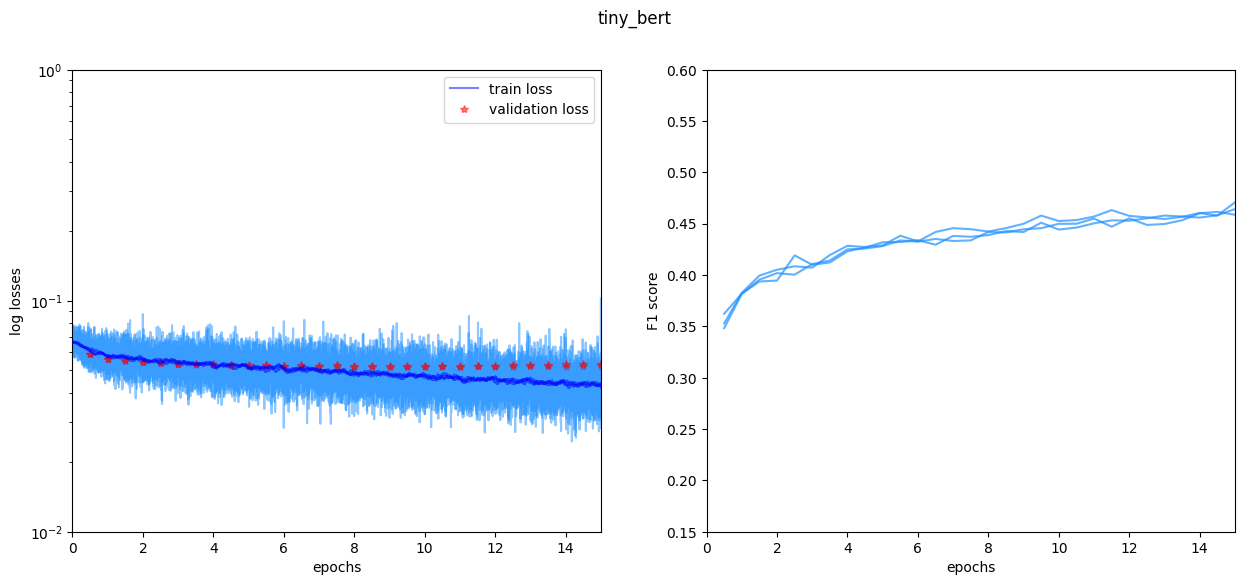

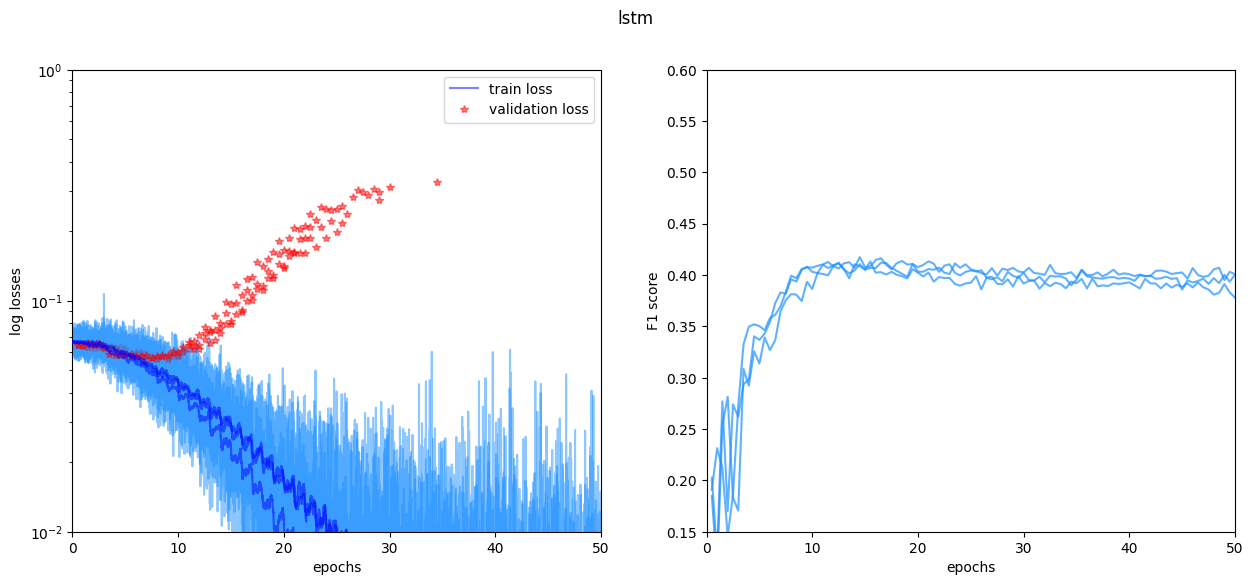

In [3]:
from src.training.training_analysis import plot_training_history

plt.style.use('default')

for test in tests1+tests2:
    fig = plt.figure(figsize=(15,6))
    fig.suptitle(test['test_name'])

    LHs=0
    VHs=0
    F1s=0
    for i, seed in enumerate(seeds,):
        plt.subplot(1,2,1)
        H=torch.load(f"{results}{seed}/{test['test_name']}.pth",map_location='cpu')
        if seed==42:
            H['train_loss_history']=H['train_loss_history'][:len(H['train_loss_history'])]
            H['val_loss_history']=H['val_loss_history'][:len(H['val_loss_history'])]
            H['val_f1_macro_history']=H['val_f1_macro_history'][:len(H['val_f1_macro_history'])]
        LH = H['train_loss_history']
        VH = H['val_loss_history']
        VF1 = H['val_f1_macro_history']
        LHs+= H['train_loss_history'][:8325]
        VHs+= H['val_loss_history']
        F1s+= H['val_f1_macro_history']


        plt.plot(np.arange(len(LH))/len(LH)*len(VH)/2, LH, color="dodgerblue", alpha = 0.5)
        
        if i==0:
            plt.plot(np.arange(len(LH))/len(LH)*len(VH)/2, 
                 np.convolve(LH, np.ones(100),'same')/np.convolve(np.ones_like(LH), np.ones(100),'same'), 
                 color="blue", alpha = 0.5, zorder=i+len(seeds), label='train loss')
            plt.plot(VH[:,0]/len(LH)*len(VH)/2,VH[:,1],"r*", alpha = 0.5, label='validation loss')
        else:
            plt.plot(np.arange(len(LH))/len(LH)*len(VH)/2, 
                 np.convolve(LH, np.ones(100),'same')/np.convolve(np.ones_like(LH), np.ones(100),'same'), 
                 color="blue", alpha = 0.5, zorder=i+len(seeds))
            plt.plot(VH[:,0]/len(LH)*len(VH)/2,VH[:,1],"r*", alpha = 0.5)
            
        plt.yscale('log')
        plt.xlim(0,VF1[-1,0]/len(LH)*len(VH)/2)
        plt.ylim(0.01,1)
        plt.xlabel('epochs')
        plt.ylabel('log losses')
        
        plt.subplot(1,2,2)
        plt.plot(VF1[:,0]/len(LH)*len(VH)/2,VF1[:,1], color = "dodgerblue", alpha = 0.7)
        plt.xlim(0,VF1[-1,0]/len(LH)*len(VH)/2)
        plt.ylim(0.15,0.60)
        plt.xlabel('epochs')
        plt.ylabel('F1 score')
        
        plt.subplot(1,2,1)
    plt.legend()

Text(0, 0.5, 'F1 score')

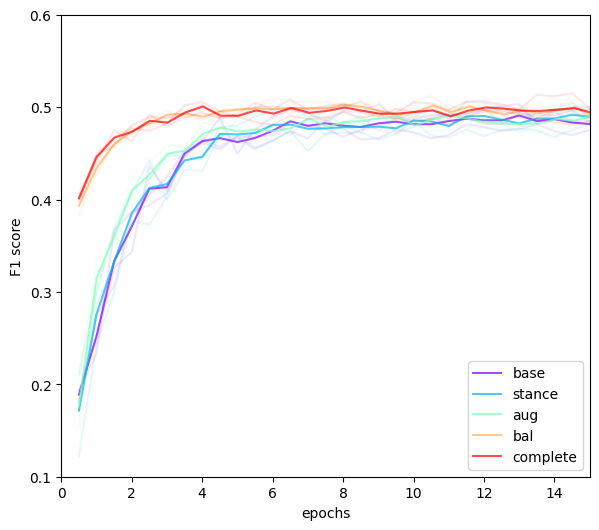

In [4]:
fig = plt.figure(figsize=(15,6))

colors = plt.cm.rainbow(np.linspace(0, 1, len(tests1)))

for test, color in zip(tests1,colors):
    #fig = plt.figure(figsize=(15,6))
    #fig.suptitle(test['name'])
    LHs=0
    VHs=0
    F1s=0
    for seed in seeds:
        plt.subplot(1,2,1)
        H=torch.load(f"{results}{seed}/{test['test_name']}.pth",map_location='cpu')
        if seed==42:
            H['train_loss_history']=H['train_loss_history'][:len(H['train_loss_history'])]
            H['val_loss_history']=H['val_loss_history'][:len(H['val_loss_history'])]
            H['val_f1_macro_history']=H['val_f1_macro_history'][:len(H['val_f1_macro_history'])]
        LH = H['train_loss_history']
        VH = H['val_loss_history']
        VF1 = H['val_f1_macro_history']
        LHs+= H['train_loss_history'][:8340]
        VHs+= H['val_loss_history']
        F1s+= H['val_f1_macro_history']
        
        plt.plot(VF1[:,0]/len(LH)*len(VH)/2,VF1[:,1], alpha=0.1, color=color)

    LHs/=len(seeds)
    VHs/=len(seeds)
    F1s/=len(seeds)
    
    plt.plot(F1s[:,0]/len(LHs)*len(VHs)/2,F1s[:,1],  label=test['test_name'], alpha=0.7, color=color)
    plt.xlim(0,15)
    plt.ylim(0.10,0.60)

plt.legend()
plt.xlabel('epochs')
plt.ylabel('F1 score')

Text(0, 0.5, 'F1 score')

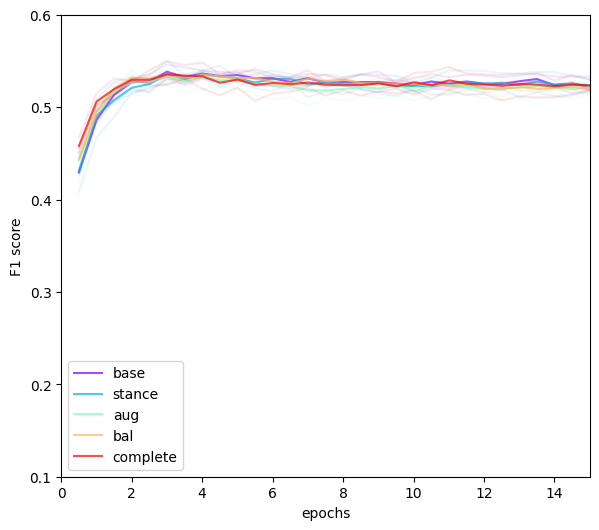

In [5]:
fig = plt.figure(figsize=(15,6))

colors = plt.cm.rainbow(np.linspace(0, 1, len(tests1)))

for test, color in zip(tests1,colors):
    #fig = plt.figure(figsize=(15,6))
    #fig.suptitle(test['name'])
    LHs=0
    VHs=0
    F1s=0
    for seed in seeds:
        plt.subplot(1,2,1)
        H=torch.load(f"{results_t}{seed}/{test['test_name']}.pth",map_location='cpu')
        if seed==42:
            H['train_loss_history']=H['train_loss_history'][:len(H['train_loss_history'])]
            H['val_loss_history']=H['val_loss_history'][:len(H['val_loss_history'])]
            H['val_f1_macro_history']=H['val_f1_macro_history'][:len(H['val_f1_macro_history'])]
        LH = H['train_loss_history']
        VH = H['val_loss_history']
        VF1 = H['val_f1_macro_history']
        LHs+= H['train_loss_history'][:8340]
        VHs+= H['val_loss_history']
        F1s+= H['val_f1_macro_history']
        
        plt.plot(VF1[:,0]/len(LH)*len(VH)/2,VF1[:,1], alpha=0.1, color=color)

    LHs/=len(seeds)
    VHs/=len(seeds)
    F1s/=len(seeds)
    
    plt.plot(F1s[:,0]/len(LHs)*len(VHs)/2,F1s[:,1],  label=test['test_name'], alpha=0.7, color=color)
    plt.xlim(0,15)
    plt.ylim(0.10,0.60)

plt.legend()
plt.xlabel('epochs')
plt.ylabel('F1 score')

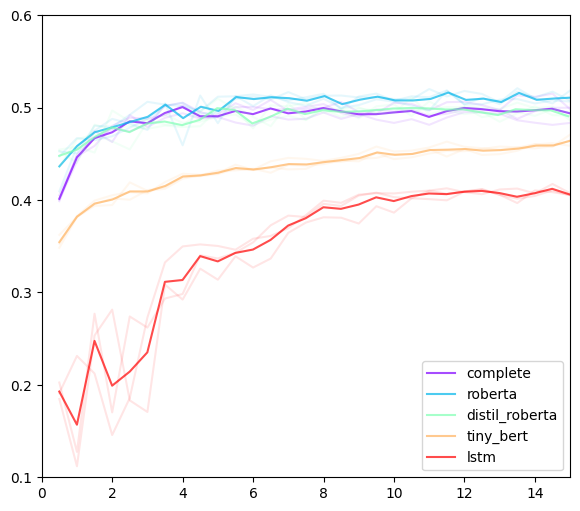

In [6]:
fig = plt.figure(figsize=(15,6))

colors = plt.cm.rainbow(np.linspace(0, 1, len(tests2)))

for test, color in zip(tests2,colors):
    #fig = plt.figure(figsize=(15,6))
    #fig.suptitle(test['name'])
    LHs=0
    VHs=0
    F1s=0
    for seed in seeds:
        plt.subplot(1,2,1)
        H=torch.load(f"{results}{seed}/{test['test_name']}.pth",map_location='cpu')
        if seed==42:
            H['train_loss_history']=H['train_loss_history'][:len(H['train_loss_history'])]
            H['val_loss_history']=H['val_loss_history'][:len(H['val_loss_history'])]
            H['val_f1_macro_history']=H['val_f1_macro_history'][:len(H['val_f1_macro_history'])]
        LH = H['train_loss_history']
        VH = H['val_loss_history']
        VF1 = H['val_f1_macro_history']
        LHs+= H['train_loss_history'][:8325]
        VHs+= H['val_loss_history']
        F1s+= H['val_f1_macro_history']
        
        plt.plot(VF1[:,0]/len(LH)*len(VH)/2,VF1[:,1], alpha=0.1, color=color)

    LHs/=len(seeds)
    VHs/=len(seeds)
    F1s/=len(seeds)
    
    plt.plot(F1s[:,0]/len(LH)*len(VHs)/2,F1s[:,1],  label=test['test_name'], alpha=0.7, color=color)
    plt.xlim(0,15)
    plt.ylim(0.10,0.60)

plt.legend()


Text(0, 0.5, 'F1 score')

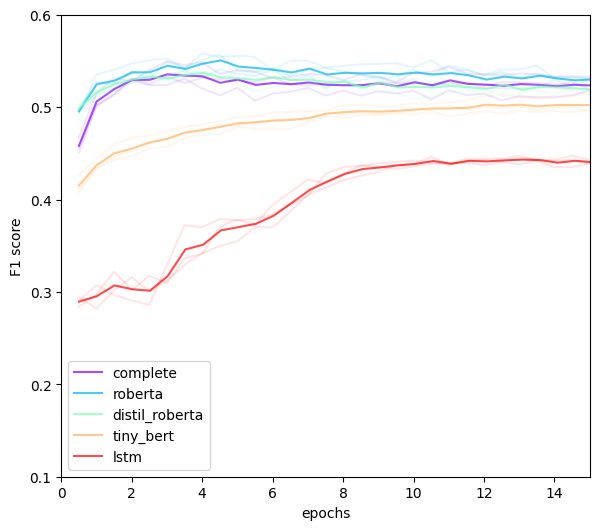

In [7]:
fig = plt.figure(figsize=(15,6))

colors = plt.cm.rainbow(np.linspace(0, 1, len(tests2)))

for test, color in zip(tests2,colors):
    #fig = plt.figure(figsize=(15,6))
    #fig.suptitle(test['name'])
    LHs=0
    VHs=0
    F1s=0
    for seed in seeds:
        plt.subplot(1,2,1)
        H=torch.load(f"{results_t}{seed}/{test['test_name']}.pth",map_location='cpu')
        if seed==42:
            H['train_loss_history']=H['train_loss_history'][:len(H['train_loss_history'])]
            H['val_loss_history']=H['val_loss_history'][:len(H['val_loss_history'])]
            H['val_f1_macro_history']=H['val_f1_macro_history'][:len(H['val_f1_macro_history'])]
        LH = H['train_loss_history']
        VH = H['val_loss_history']
        VF1 = H['val_f1_macro_history']
        LHs+= H['train_loss_history'][:8325]
        VHs+= H['val_loss_history']
        F1s+= H['val_f1_macro_history']
        
        plt.plot(VF1[:,0]/len(LH)*len(VH)/2,VF1[:,1], alpha=0.1, color=color)

    LHs/=len(seeds)
    VHs/=len(seeds)
    F1s/=len(seeds)
    
    plt.plot(F1s[:,0]/len(LHs)*len(VHs)/2,F1s[:,1],  label=test['test_name'], alpha=0.7, color=color)
    plt.xlim(0,15)
    plt.ylim(0.10,0.60)

plt.legend()
plt.xlabel('epochs')
plt.ylabel('F1 score')

In [8]:
from src.datasets.dataset_builder import get_dataframes

from src.models.transformer_model  import get_transformer_model
from torch import cuda

from transformers import AutoTokenizer

from src.datasets.dataloader_builder import get_dataloader


arguments_test_df, labels_test_df = get_dataframes('data', 'validation')
TARGETS = labels_test_df.columns.to_list()

MODEL_NAME = 'bert-base-uncased'
DEVICE = 'cuda' if cuda.is_available() else 'cpu'

tokenizer = AutoTokenizer.from_pretrained(
    MODEL_NAME, problem_type='multi_label_classification')

tokenizer.add_tokens(['[FAV]', '[AGN]'], special_tokens=True)

stance_encoder = {'in favor of': '[FAV]', 'against': '[AGN]'}

model = get_transformer_model(MODEL_NAME, num_labels=len(TARGETS),
                              tokenizer=tokenizer, device=DEVICE)

BATCH_SIZE_EVAL = 16

test_loader = get_dataloader(arguments_test_df, labels_test_df, tokenizer,
                             stance_encoder, is_transformer=True,
                             batch_size=BATCH_SIZE_EVAL, shuffle=False,
                             use_all_instance=False)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [9]:
from src.evaluation.evaluation import get_dataset_prediction_scores
from src.evaluation.evaluation_analysis import plot_roc_curves
from src.evaluation.evaluation_analysis import plot_precision_recall_f1_macro_curves
from src.evaluation.evaluation_analysis import print_classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

for test in tests1:
    f1=0
    t_f1=0

    test['areas']=[]
    test['f1']=[]
    test['t_f1']=[]

    for seed in seeds:
            
        H=torch.load(f"results/{seed}/{test['test_name']}.pth")
        thresholds = np.load(f"results/{seed}/{test['test_name']}_thresholds.npy")

        model.load_state_dict(H['model_state_dict'])
        y_score, y_true = get_dataset_prediction_scores(model, test_loader, DEVICE)
        #plot_roc_curves(y_true, y_scores, TARGETS, 'validation')
        test['f1'].append(f1_score(y_true=y_true, y_pred= y_score > 0, average='macro')) 
        test['t_f1'].append(f1_score(y_true=y_true, y_pred= y_score > thresholds, average='macro'))
        test['areas'].append(roc_auc_score(y_true, y_score))

In [10]:
[test['test_name'] for test in tests1]

['base', 'stance', 'aug', 'bal', 'complete']

[Text(0, 0, 'base'),
 Text(1, 0, 'stance'),
 Text(2, 0, 'aug'),
 Text(3, 0, 'bal'),
 Text(4, 0, 'complete')]

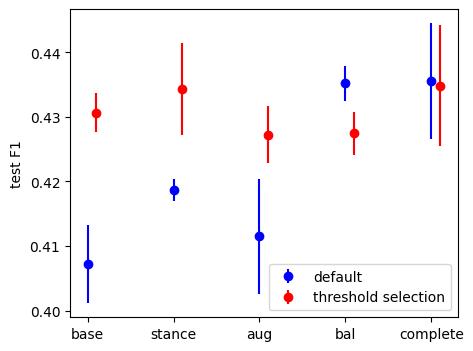

In [11]:
fig, ax = plt.subplots(figsize=(5,4))
ax.errorbar(np.arange(5),[np.mean(test['f1']) for test in tests1],[np.std(test['f1']) for test in tests1],fmt='ob', label='default')
ax.errorbar(np.arange(5)+0.1,[np.mean(test['t_f1']) for test in tests1],[np.std(test['t_f1']) for test in tests1],fmt='or', label='threshold selection')
ax.set_ylabel('test F1')

plt.legend(loc='lower right')

ax.set_xticks(np.arange(5))
ax.set_xticklabels([test['test_name'] for test in tests1])

[Text(0, 0, 'base'),
 Text(1, 0, 'stance'),
 Text(2, 0, 'aug'),
 Text(3, 0, 'bal'),
 Text(4, 0, 'complete')]

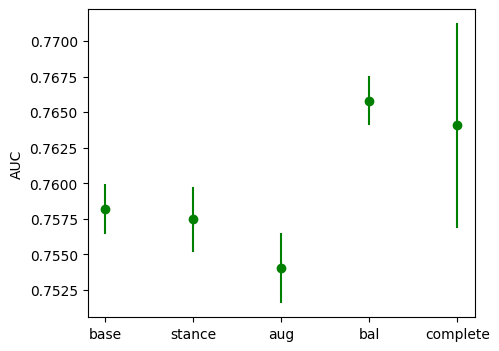

In [12]:
fig, ax = plt.subplots(figsize=(5,4))
ax.errorbar(np.arange(5),[np.mean(test['areas']) for test in tests1],[np.std(test['areas']) for test in tests1],fmt='og')
ax.set_ylabel('AUC')

ax.set_xticks(np.arange(5))
ax.set_xticklabels([test['test_name'] for test in tests1])

In [13]:
from src.evaluation.evaluation import get_dataset_prediction_scores
from src.evaluation.evaluation_analysis import plot_roc_curves
from src.evaluation.evaluation_analysis import plot_precision_recall_f1_macro_curves
from src.evaluation.evaluation_analysis import print_classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from src.datasets.dataset_builder import split_dataframes
import os
from src.datasets.dataset_builder import get_dataframes
from src.datasets.dataloader_builder import get_dataloader
from src.utils.seeder import set_random_seed

BATCH_SIZE_TRAIN = 8
BATCH_SIZE_EVAL = 16

for test in tests1+tests2:

    print(test['test_name'])
    f1=0
    t_f1=0

    test['areas']=[]
    test['f1']=[]
    test['t_f1']=[]

    test['v_areas']=[]
    test['v_f1']=[]
    test['v_t_f1']=[]

    for seed in seeds:
        print(seed)
            
        H=torch.load(f"results/{seed}/{test['test_name']}.pth")
        thresholds = np.load(f"results/{seed}/{test['test_name']}_thresholds.npy")

        set_random_seed(seed)

        arguments_train_df, labels_train_df = get_dataframes('data', 'training')
        arguments_test_df, labels_test_df = get_dataframes('data', 'validation')
        TARGETS = labels_train_df.columns.to_list()

        (arguments_train_df, labels_train_df), (arguments_val_df, labels_val_df) , augmented_df = \
                split_dataframes(   arguments_train_df, 
                                    labels_train_df, 
                                    seed=seed,
                                    augmented_premises_file = os.path.join('data', 'augmented-premises.txt') if test['augmentation'] else None)

        if test['model_name']=='lstm':

            from src.embeddings.embedding_matrix import load_embedding_model

            # Set the dimension of the embeddings to load.
            EMBEDDING_DIMENSION = 100

            # Get the GLOVE embeddings.
            GLOVE_embeddings = load_embedding_model(folder_path='./data',
                                                    embedding_dim=EMBEDDING_DIMENSION)
            
            from src.embeddings.vocabulary import get_texts_from_arguments_dataframes

            # Build a dictionary to encde the stance.
            stance_encoder = { 'in favor of': '[FAV]', 'against': '[AGN]' }

            # Get a list of all the sentences in the datasets in the form
            # '<premise> [FAV]/[AGN] <conclusion>'
            texts = get_texts_from_arguments_dataframes(
                stance_encoder, arguments_train_df, arguments_val_df, arguments_test_df, augmented_df)

            from src.embeddings.vocabulary import get_vocabulary

            # Get the vocabulary and the tokenizer.
            vocabulary, tokenizer = get_vocabulary(texts)

            from src.embeddings.embedding_matrix import build_embedding_matrix

            # Get the embedding matrix from GLOVE and the given vocabulary.
            embedding_matrix = build_embedding_matrix(
                vocabulary=vocabulary, GLOVE_embeddings=GLOVE_embeddings,
                embedding_dimension=EMBEDDING_DIMENSION)

            from src.models.lstm_model import LSTM

            model = LSTM(DEVICE, embedding_matrix, len(TARGETS))
            
            train_loader = get_dataloader(arguments_train_df, labels_train_df, tokenizer,
                                        stance_encoder, is_transformer=False, 
                                        batch_size=BATCH_SIZE_TRAIN, shuffle=True,
                                        use_all_instance=test['stance'])
            val_loader = get_dataloader(arguments_val_df, labels_val_df, tokenizer,
                                        stance_encoder, is_transformer=False,
                                        batch_size=BATCH_SIZE_EVAL, shuffle=False,
                                        use_all_instance=test['stance'])
            test_loader = get_dataloader(arguments_test_df, labels_test_df, tokenizer,
                                        stance_encoder, is_transformer=False,
                                        batch_size=BATCH_SIZE_EVAL, shuffle=False,
                                        use_all_instance=test['stance'])
            
        else:
            
            from transformers import AutoTokenizer, logging
            
            # Set verbosity at "error" level
            logging.set_verbosity_error()

            tokenizer = AutoTokenizer.from_pretrained(
                test['model_name'], problem_type='multi_label_classification')

            # Add the tokens encoding the stance to the tokenizer.
            tokenizer.add_tokens(['[FAV]', '[AGN]'], special_tokens=True)

            # Build a dictionary to encde the stance.
            stance_encoder = {'in favor of': '[FAV]', 'against': '[AGN]'}

            from src.models.transformer_model  import get_transformer_model

            model = get_transformer_model(test['model_name'], num_labels=len(TARGETS),
                                    tokenizer=tokenizer, device=DEVICE)
            
            train_loader = get_dataloader(arguments_train_df, labels_train_df, tokenizer,
                                        stance_encoder, is_transformer=True, 
                                        batch_size=BATCH_SIZE_TRAIN, shuffle=True,
                                        use_all_instance=test['stance'])
            val_loader = get_dataloader(arguments_val_df, labels_val_df, tokenizer,
                                        stance_encoder, is_transformer=True,
                                        batch_size=BATCH_SIZE_EVAL, shuffle=False,
                                        use_all_instance=test['stance'])
            test_loader = get_dataloader(arguments_test_df, labels_test_df, tokenizer,
                                        stance_encoder, is_transformer=True,
                                        batch_size=BATCH_SIZE_EVAL, shuffle=False,
                                        use_all_instance=test['stance'])

    
        model.load_state_dict(H['model_state_dict'])

        y_score, y_true = get_dataset_prediction_scores(model, test_loader, DEVICE)
        #plot_roc_curves(y_true, y_scores, TARGETS, 'validation')
        test['f1'].append(f1_score(y_true=y_true, y_pred= y_score > 0, average='macro')) 
        test['t_f1'].append(f1_score(y_true=y_true, y_pred= y_score > thresholds, average='macro'))
        test['areas'].append(roc_auc_score(y_true, y_score))

        y_score, y_true = get_dataset_prediction_scores(model, val_loader, DEVICE)
        #plot_roc_curves(y_true, y_scores, TARGETS, 'validation')
        test['v_f1'].append(f1_score(y_true=y_true, y_pred= y_score > 0, average='macro')) 
        test['v_t_f1'].append(f1_score(y_true=y_true, y_pred= y_score > thresholds, average='macro'))
        test['v_areas'].append(roc_auc_score(y_true, y_score))

    test['params']=sum(p.numel() for p in model.parameters())
        

base
42
77
93
stance
42
77
93
aug
42


d:\Scuola\02_UniBo\2_anno\NLP\Projects\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


77


d:\Scuola\02_UniBo\2_anno\NLP\Projects\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


93


d:\Scuola\02_UniBo\2_anno\NLP\Projects\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


bal
42


d:\Scuola\02_UniBo\2_anno\NLP\Projects\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


77


d:\Scuola\02_UniBo\2_anno\NLP\Projects\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


93


d:\Scuola\02_UniBo\2_anno\NLP\Projects\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


complete
42


d:\Scuola\02_UniBo\2_anno\NLP\Projects\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


77


d:\Scuola\02_UniBo\2_anno\NLP\Projects\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


93


d:\Scuola\02_UniBo\2_anno\NLP\Projects\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


complete
42


d:\Scuola\02_UniBo\2_anno\NLP\Projects\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


77


d:\Scuola\02_UniBo\2_anno\NLP\Projects\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


93


d:\Scuola\02_UniBo\2_anno\NLP\Projects\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


roberta
42


d:\Scuola\02_UniBo\2_anno\NLP\Projects\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


77


d:\Scuola\02_UniBo\2_anno\NLP\Projects\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


93


d:\Scuola\02_UniBo\2_anno\NLP\Projects\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


distil_roberta
42


d:\Scuola\02_UniBo\2_anno\NLP\Projects\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


77


d:\Scuola\02_UniBo\2_anno\NLP\Projects\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


93


d:\Scuola\02_UniBo\2_anno\NLP\Projects\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


tiny_bert
42


d:\Scuola\02_UniBo\2_anno\NLP\Projects\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


77


d:\Scuola\02_UniBo\2_anno\NLP\Projects\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


93


d:\Scuola\02_UniBo\2_anno\NLP\Projects\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


lstm
42


d:\Scuola\02_UniBo\2_anno\NLP\Projects\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


77


d:\Scuola\02_UniBo\2_anno\NLP\Projects\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


93


d:\Scuola\02_UniBo\2_anno\NLP\Projects\NLP-project\src\datasets\dataset_builder.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  augmented_df['Premise'] = augmented_premises


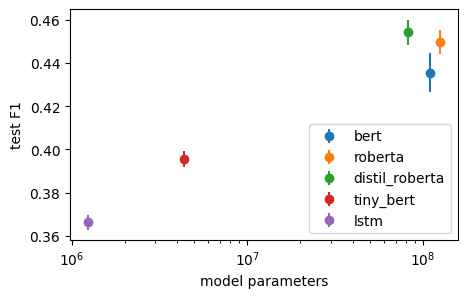

In [14]:
plt.figure(figsize=(5,3))
for test in tests2:
    plt.errorbar(test['params'] ,np.mean(test['f1']) ,np.std(test['f1']) ,fmt='o', label=test['test_name'] if test['test_name']!='complete' else 'bert')
plt.legend(loc='lower right')
plt.ylabel('test F1')
plt.xlabel('model parameters')
plt.xscale('log')

In [22]:
import pandas as pd
r_df = pd.DataFrame()

F1=[]
for test in tests1+tests2[1:]:
    f1=[]
    for seed in seeds:
        H=torch.load(f"{results}/{seed}/{test['test_name']}.pth")
        f1.append(H['val_f1_macro_history'][:,1])
    F1.append(f1)

F1_t=[]
for test in tests1+tests2[1:]:
    f1_t=[]
    for seed in seeds:
        H=torch.load(f"{results_t}/{seed}/{test['test_name']}.pth")
        f1_t.append(H['val_f1_macro_history'][:,1])
    F1_t.append(f1_t)

r_df['models']   = [test['test_name'] for test in tests1+tests2[1:]]

r_df['m_val']    = [np.mean(f1) for f1 in F1]
r_df['v_val']    = [np.std(f1) for f1 in F1]

r_df['m_val_t']  = [np.mean(f1_t) for f1_t in F1_t]
r_df['v_val_t']  = [np.std(f1_t) for f1_t in F1_t]

r_df['m_test']   = [np.mean(test['f1']) for test in tests1+tests2[1:]]
r_df['v_test']   = [np.std(test['f1']) for test in tests1+tests2[1:]]

r_df['m_test_t'] = [np.mean(test['t_f1']) for test in tests1+tests2[1:]]
r_df['v_test_t'] = [np.std(test['t_f1']) for test in tests1+tests2[1:]]

r_df

,models,m_val,v_val,m_val_t,v_val_t,m_test,v_test,m_test_t,v_test_t
0,base,0.448643,0.072110,0.523293,0.020329,0.407192,0.006046,0.430653,0.003022
1,stance,0.449314,0.072692,0.521743,0.020982,0.418704,0.001684,0.434323,0.007158
2,aug,0.456456,0.065601,0.519470,0.017868,0.411487,0.008923,0.427262,0.004377
3,bal,0.488409,0.022833,0.522596,0.016839,0.435215,0.002690,0.427464,0.003366
4,complete,0.488335,0.020750,0.523158,0.015760,0.435514,0.008980,0.434824,0.009342
5,roberta,0.500300,0.019415,0.535237,0.012140,0.449826,0.005542,0.445781,0.007621
6,distil_roberta,0.489036,0.014747,0.524849,0.009312,0.454228,0.005789,0.447475,0.005865
7,tiny_bert,0.434012,0.025494,0.483989,0.022278,0.395737,0.003674,0.388991,0.006141
8,lstm,0.383178,0.049909,0.393805,0.054898,0.366248,0.003331,0.363652,0.013053


In [25]:
print(r_df.to_latex())

\begin{tabular}{llrrrrrrrr}
\toprule
{} &          models &     m\_val &     v\_val &   m\_val\_t &   v\_val\_t &    m\_test &    v\_test &  m\_test\_t &  v\_test\_t \\
\midrule
0 &            base &  0.448643 &  0.072110 &  0.523293 &  0.020329 &  0.407192 &  0.006046 &  0.430653 &  0.003022 \\
1 &          stance &  0.449314 &  0.072692 &  0.521743 &  0.020982 &  0.418704 &  0.001684 &  0.434323 &  0.007158 \\
2 &             aug &  0.456456 &  0.065601 &  0.519470 &  0.017868 &  0.411487 &  0.008923 &  0.427262 &  0.004377 \\
3 &             bal &  0.488409 &  0.022833 &  0.522596 &  0.016839 &  0.435215 &  0.002690 &  0.427464 &  0.003366 \\
4 &        complete &  0.488335 &  0.020750 &  0.523158 &  0.015760 &  0.435514 &  0.008980 &  0.434824 &  0.009342 \\
5 &         roberta &  0.500300 &  0.019415 &  0.535237 &  0.012140 &  0.449826 &  0.005542 &  0.445781 &  0.007621 \\
6 &  distil\_roberta &  0.489036 &  0.014747 &  0.524849 &  0.009312 &  0.454228 &  0.005789 &  0.447475 &  

C:\Users\Sam\AppData\Local\Temp\ipykernel_11072\381999052.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(r_df.to_latex())
